## Ex2

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
X = np.array([[1, 3], [2, 2], [3, 2], [4, 1], [4, 2], 
              [2, 6], [4, 6], [3, 7], [2, 8], [1, 9],
              [8, 6], [9, 7], [7, 9], [10, 6], [8, 9],
              [8, 4], [9, 1], [10, 3], [8, 3], [9, 3]])
y = np.ones(20)
y[:5] = 0

In [3]:
indx = np.where(X[:, 0] <= 5)
y[indx].shape

(10,)

In [4]:
indx

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64),)

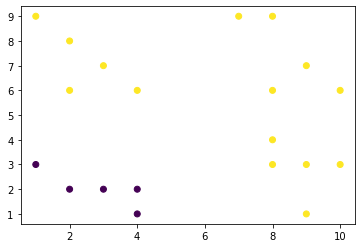

In [8]:
plt.scatter(X[:, 0], X[:, 1], c=y)

### Search x1, x2 in range (0, 10) to find max gini index

In [9]:
def calculate_gini(n1, n2):
    if n1 + n2 == 0: 
        return 1
    else: 
        return 1 - (n1/(n1+n2))**2 - (n2/(n1+n2))**2

In [10]:
calculate_gini(5, 15)

0.375

#### X0

In [11]:
g1 = calculate_gini(y.shape[0] - np.sum(y), np.sum(y))
G = {}
listOfKeys = []

for i in np.arange(0, 10, 0.5):

    # xét ngưỡng x <= i
    indx_below = np.where(X[:,0] <= i)
    y_below = y[indx_below]
    g2 = calculate_gini(y_below.shape[0] - sum(y_below), sum(y_below))

    # x > i
    indx_above = np.where(X[:,0] > i)
    y_above = y[indx_above]
    g3 = calculate_gini(y_above.shape[0] - sum(y_above), sum(y_above))

    gini_index = g1 - g2*y_below.shape[0]/y.shape[0] - g3*y_above.shape[0]/y.shape[0]
    
    G[i] = gini_index


gini_index_max = max(G.items(), key=lambda x: x[1])
for key, value in G.items():
    if value == gini_index_max[1]:
        listOfKeys.append(key)

[4.0, 4.5, 5.0, 5.5, 6.0, 6.5]

In [13]:
print(listOfKeys)

[4.0, 4.5, 5.0, 5.5, 6.0, 6.5]


In [12]:
print(G)

{0.0: 0.0, 0.5: 0.0, 1.0: 0.01388888888888895, 1.5: 0.01388888888888895, 2.0: 0.015000000000000152, 2.5: 0.015000000000000152, 3.0: 0.03434065934065933, 3.5: 0.03434065934065933, 4.0: 0.125, 4.5: 0.125, 5.0: 0.125, 5.5: 0.125, 6.0: 0.125, 6.5: 0.125, 7.0: 0.10227272727272724, 7.5: 0.10227272727272724, 8.0: 0.041666666666666685, 8.5: 0.041666666666666685, 9.0: 0.013888888888888895, 9.5: 0.013888888888888895}


#### X1

In [16]:
g1 = calculate_gini(y.shape[0] - np.sum(y), np.sum(y))
G = {}
listOfKeys = []

for i in np.arange(0, 10, 0.5):

    # xét ngưỡng x <= i
    indx_below = np.where(X[:,1] <= i)
    y_below = y[indx_below]
    g2 = calculate_gini(y_below.shape[0] - sum(y_below), sum(y_below))

    # x > i
    indx_above = np.where(X[:,1] > i)
    y_above = y[indx_above]
    g3 = calculate_gini(y_above.shape[0] - sum(y_above), sum(y_above))

    gini_index = g1 - g2*y_below.shape[0]/y.shape[0] - g3*y_above.shape[0]/y.shape[0]
    
    G[i] = gini_index


gini_index_max = max(G.items(), key=lambda x: x[1])
for key, value in G.items():
    if value == gini_index_max[1]:
        listOfKeys.append(key)

In [17]:
print(G)

{0.0: 0.0, 0.5: 0.0, 1.0: 0.01388888888888895, 1.5: 0.01388888888888895, 2.0: 0.20166666666666677, 2.5: 0.20166666666666677, 3.0: 0.15277777777777776, 3.5: 0.15277777777777776, 4.0: 0.125, 4.5: 0.125, 5.0: 0.125, 5.5: 0.125, 6.0: 0.0535714285714286, 6.5: 0.0535714285714286, 7.0: 0.03125, 7.5: 0.03125, 8.0: 0.022058823529411797, 8.5: 0.022058823529411797, 9.0: 0.0, 9.5: 0.0}


In [18]:
print(listOfKeys)

[2.0, 2.5]


## Ex3

In [25]:
data = pd.read_csv('https://raw.githubusercontent.com/nttuan8/DL_Tutorial/master/L2/dataset.csv')
data.head()

,Lương,Thời gian làm việc,Cho vay
0,10,1.0,1
1,5,2.0,1
2,6,1.8,1
3,7,1.0,1
4,8,2.0,1


In [26]:
data = data.rename(columns={'Lương': 'Salary', 'Thời gian làm việc': 'Work time', 'Cho vay': 'Lend'})
data.head()

,Salary,Work time,Lend
0,10,1.0,1
1,5,2.0,1
2,6,1.8,1
3,7,1.0,1
4,8,2.0,1


In [32]:
lend = data[data['Lend'] == 1]
not_lend = data[data['Lend'] == 0]

Text(0, 0.5, 'Work time')

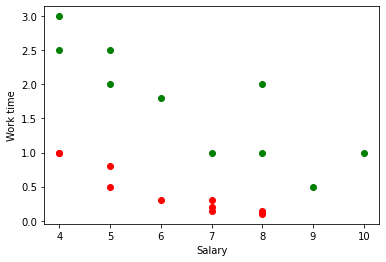

In [34]:
fig, ax = plt.subplots()
plt.scatter('Salary', 'Work time', data=lend, c='g')
plt.scatter('Salary', 'Work time', data=not_lend, c='r')
ax.set_xlabel('Salary')
ax.set_ylabel('Work time')